In [1]:
%matplotlib inline

In [2]:
plt.rcParams['figure.dpi'] = 300

In [3]:
from collections import defaultdict

In [4]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator.lmfit_resonator import LinearLossResonatorWithCable

In [5]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-15_124211_centered.npd/')

In [6]:
swp_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweep') and not 'Stream' in name]
sss_list = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]
snap_list = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]
print([(snap.x.ptp(), snap.y.ptp()) for snap in snap_list])

[(157.0, 167.0), (60.0, 62.0), (30.0, 30.0), (133.0, 122.0), (53.0, 49.0), (26.0, 27.0), (129.0, 125.0), (50.0, 50.0), (25.0, 24.0), (153.0, 145.0), (56.0, 54.0), (29.0, 27.0), (27.0, 27.0), (13.0, 13.0), (10.0, 10.0)]


In [7]:
swp_dict = defaultdict(list)
sss_dict = defaultdict(list)
for swp, sss in zip(swp_list, sss_list):
    swp_dict[sss.state.lo_index].append(swp)
    sss_dict[sss.state.lo_index].append(sss)

# Resonator model

In [8]:
for swp in swp_list:
    swp.fit_resonator(model=LinearLossResonatorWithCable)
for sss in sss_list:
    sss.sweep.fit_resonator(model=LinearLossResonatorWithCable)

# Tone centering

In [9]:
print([sss.stream.tone_offset_frequency() for sss in sss_list])

[array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.])]


# Forward scattering versus frequency

In [10]:
f_label = 'frequency / MHz'
s21_label = '$|S_{21}|^2$ / dB'
ic_title = r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'

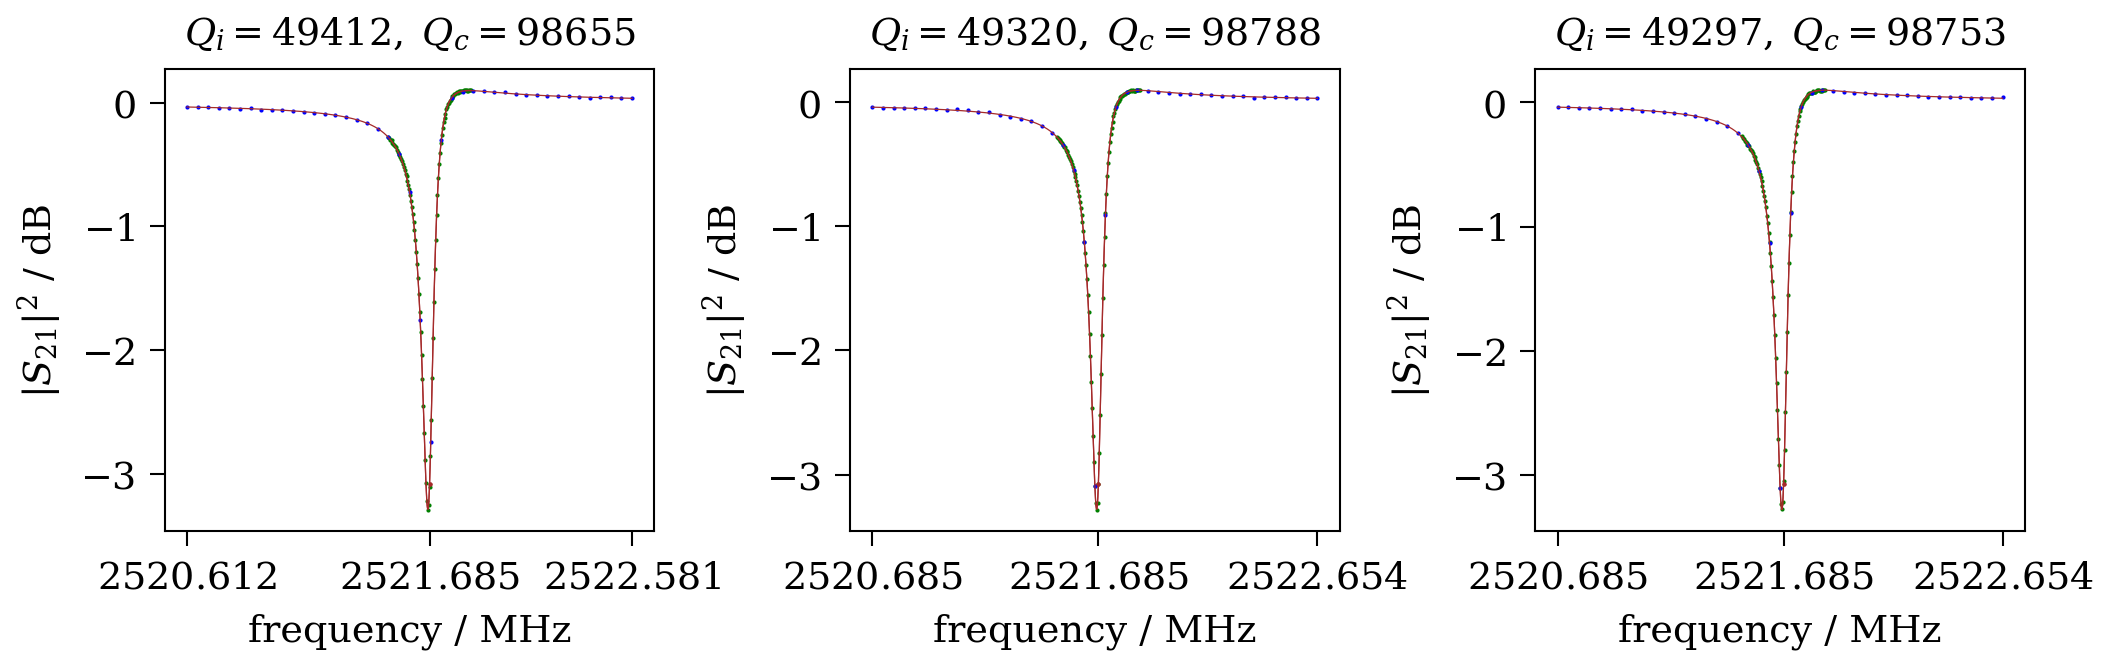

In [11]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

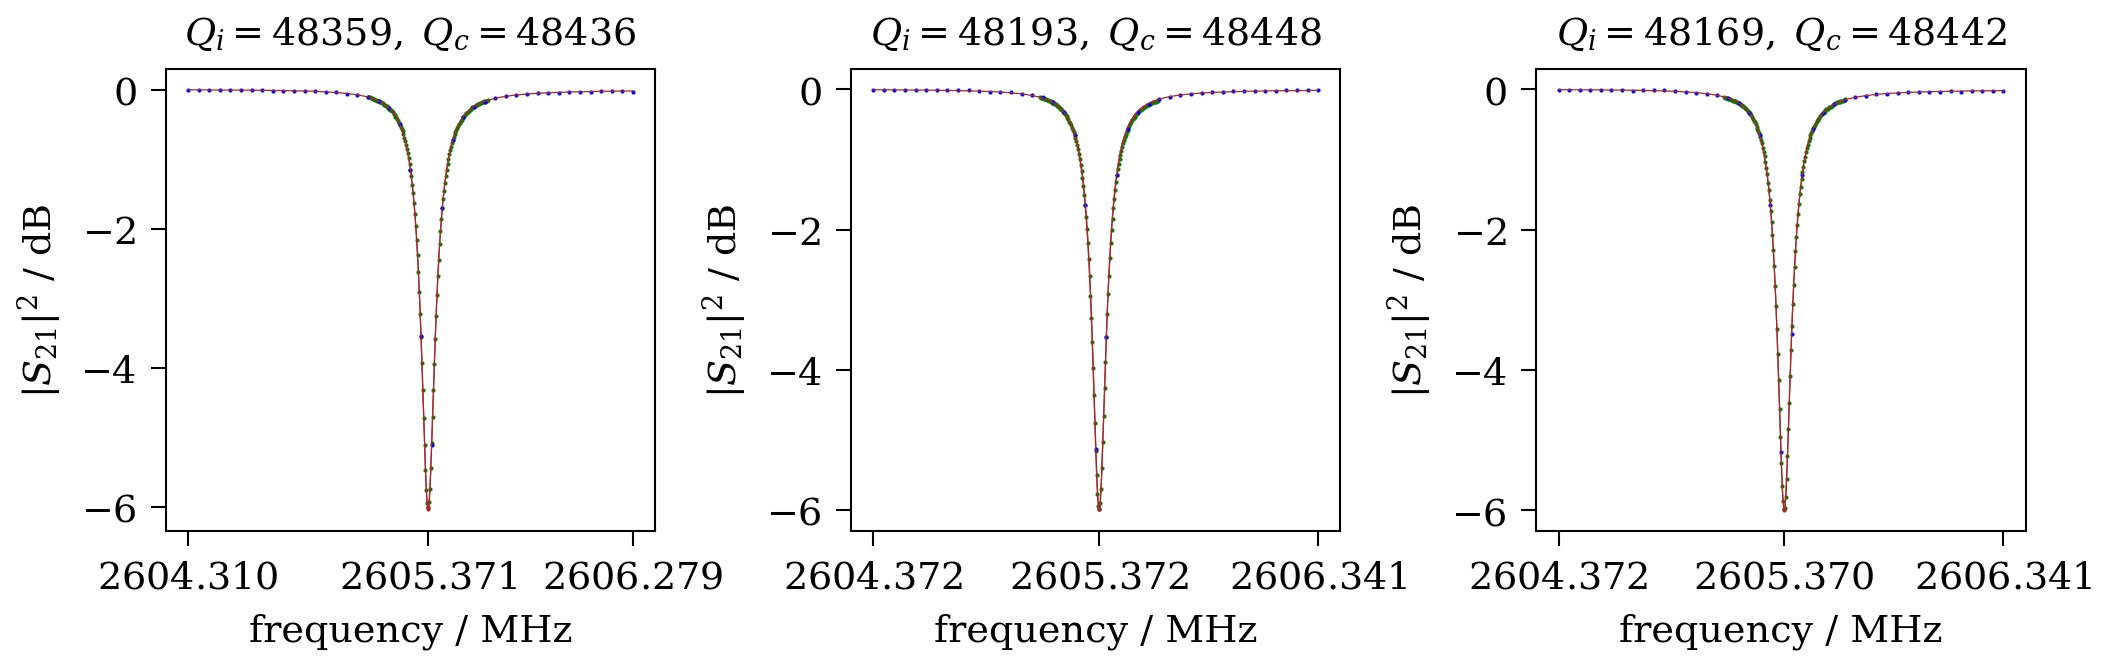

In [12]:
channel = 1
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

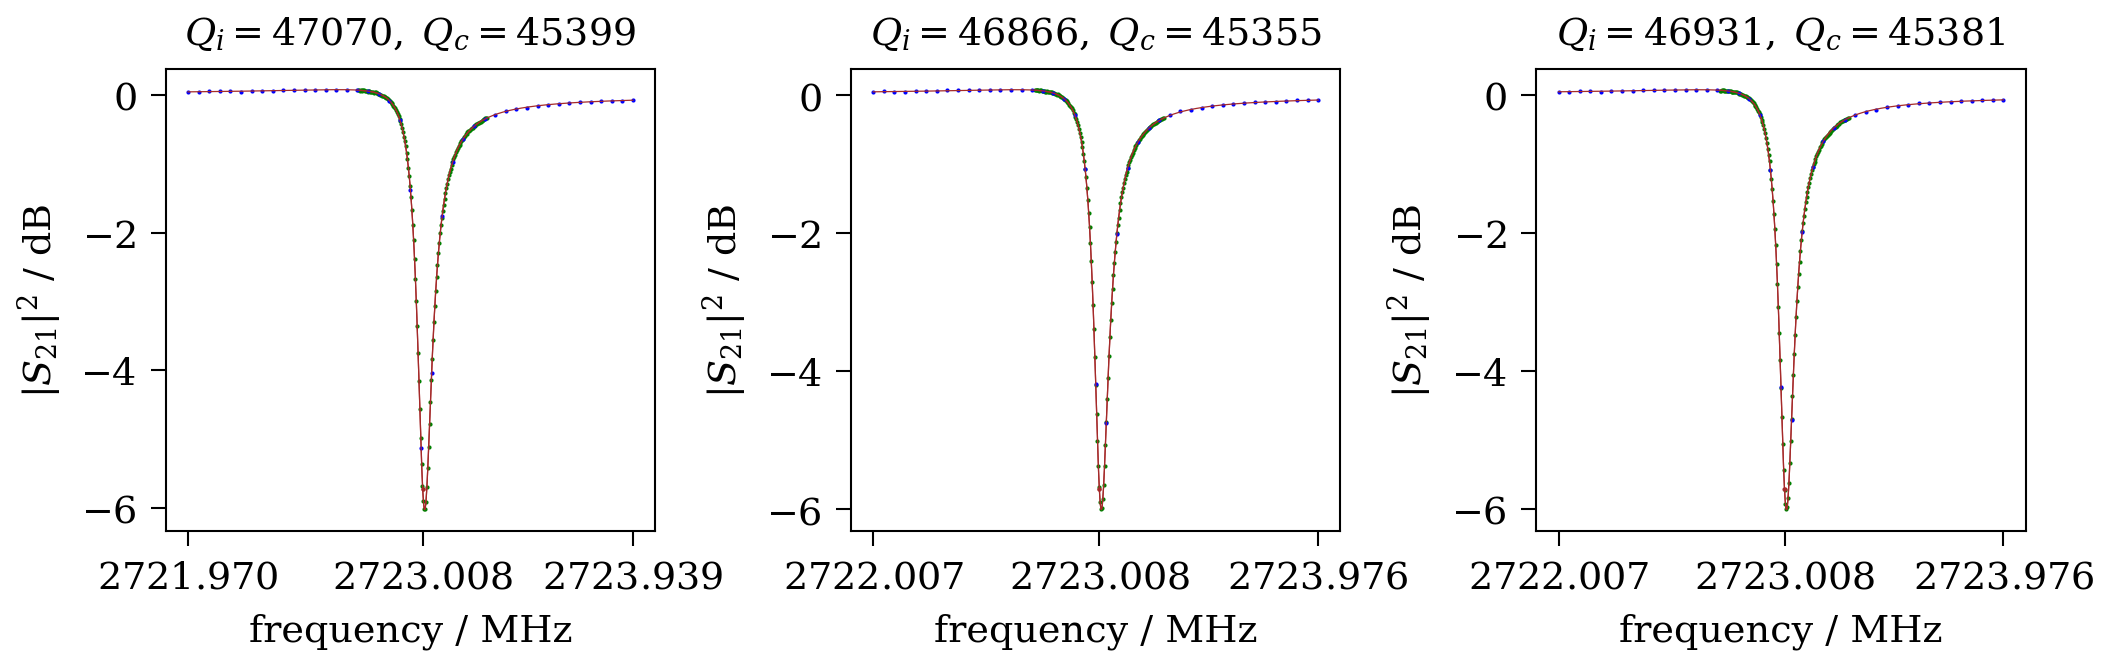

In [13]:
channel = 2
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

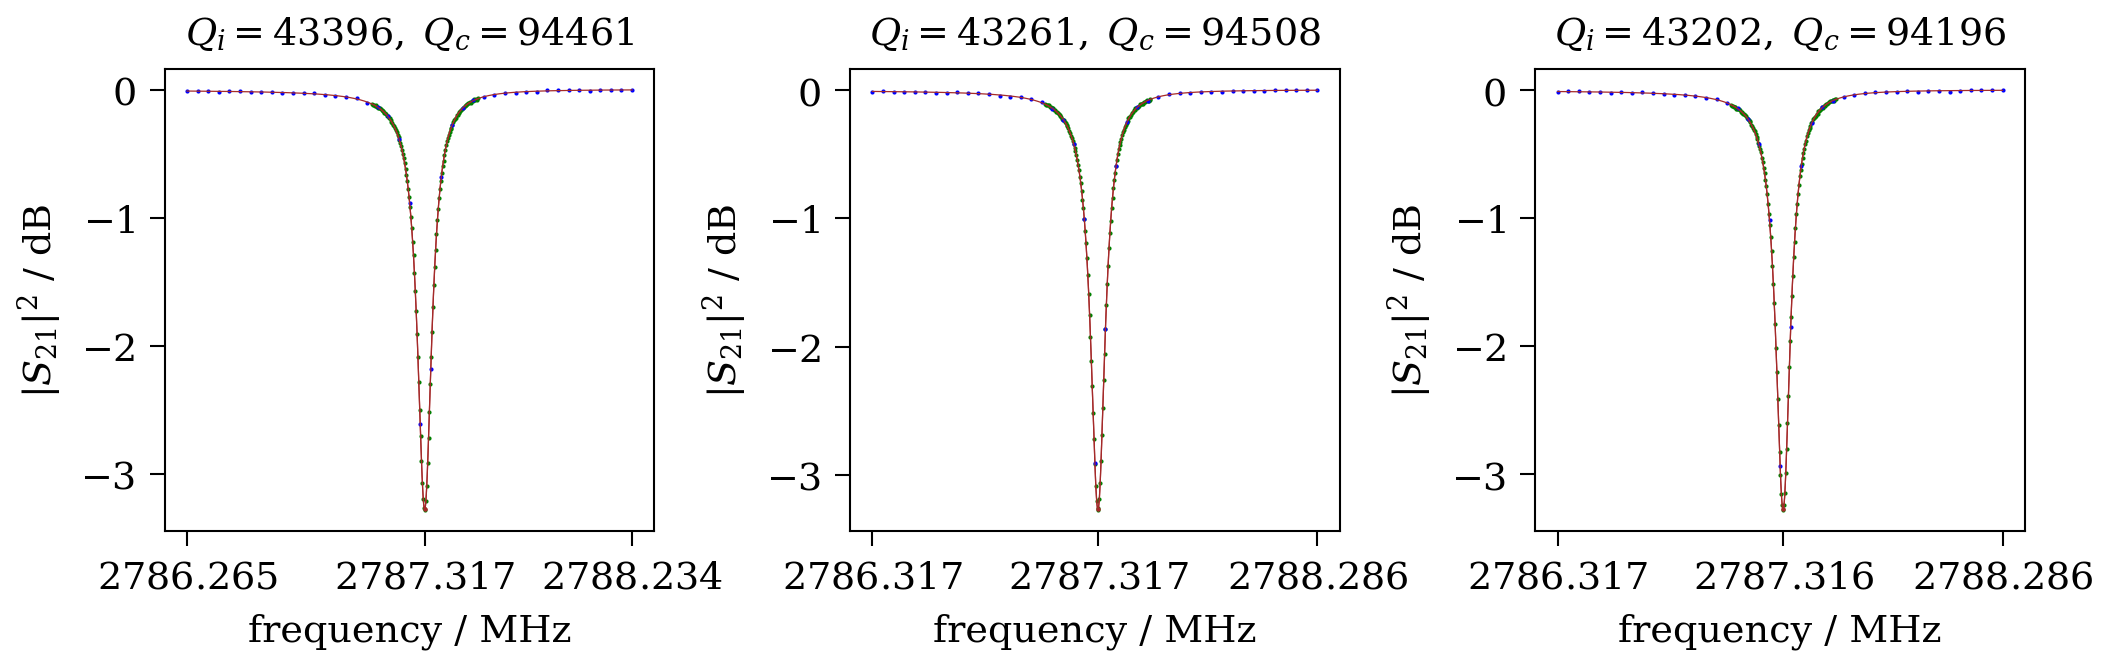

In [14]:
channel = 3
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

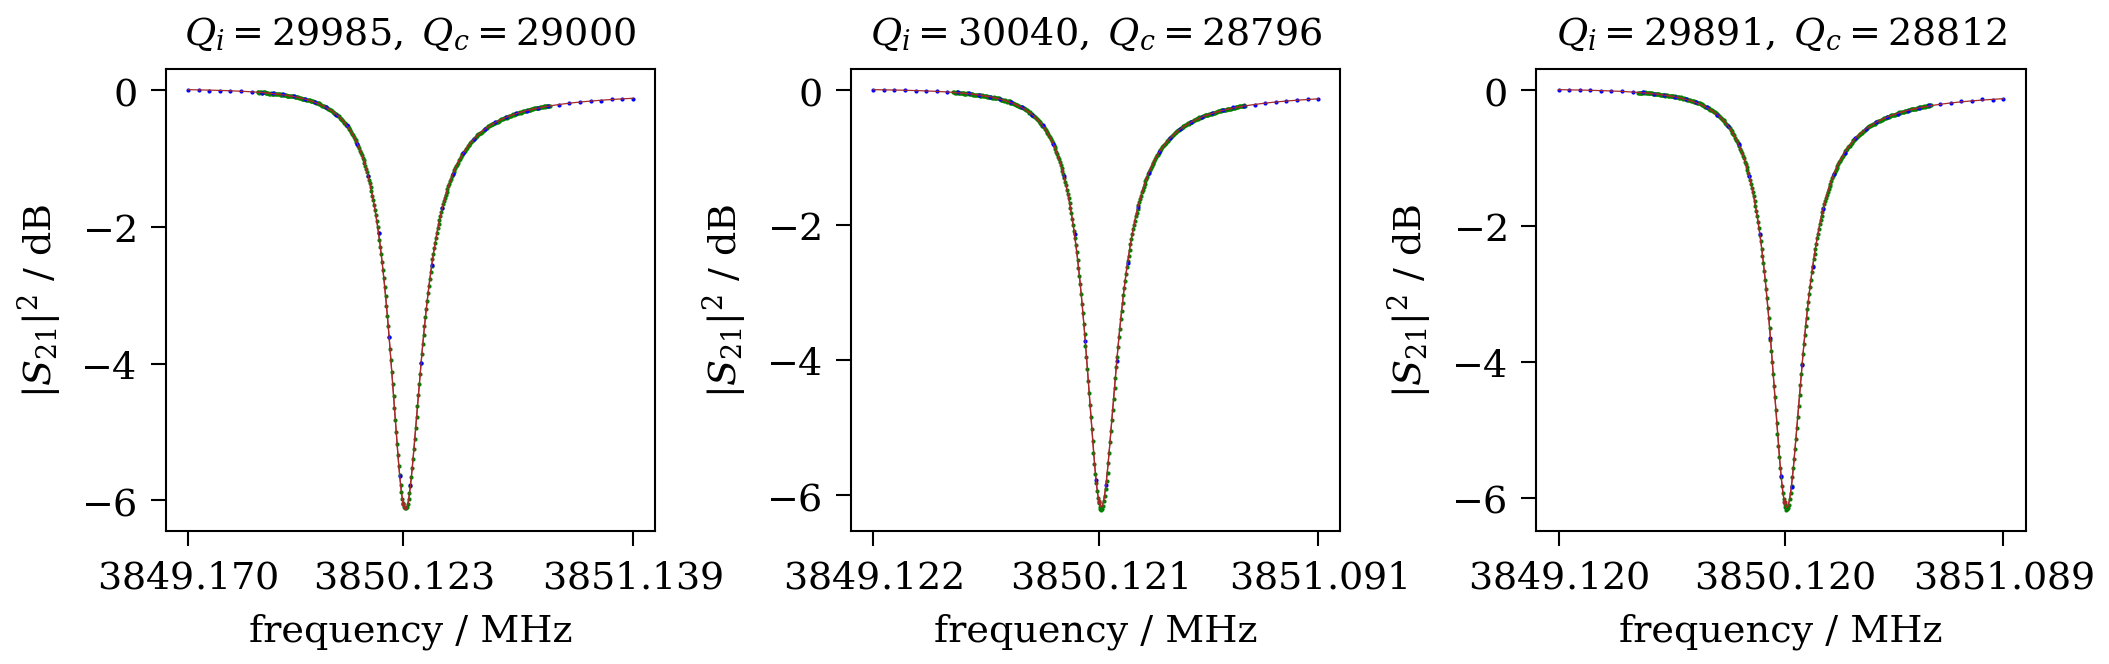

In [15]:
channel = 4
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

# Forward scattering in the complex plane

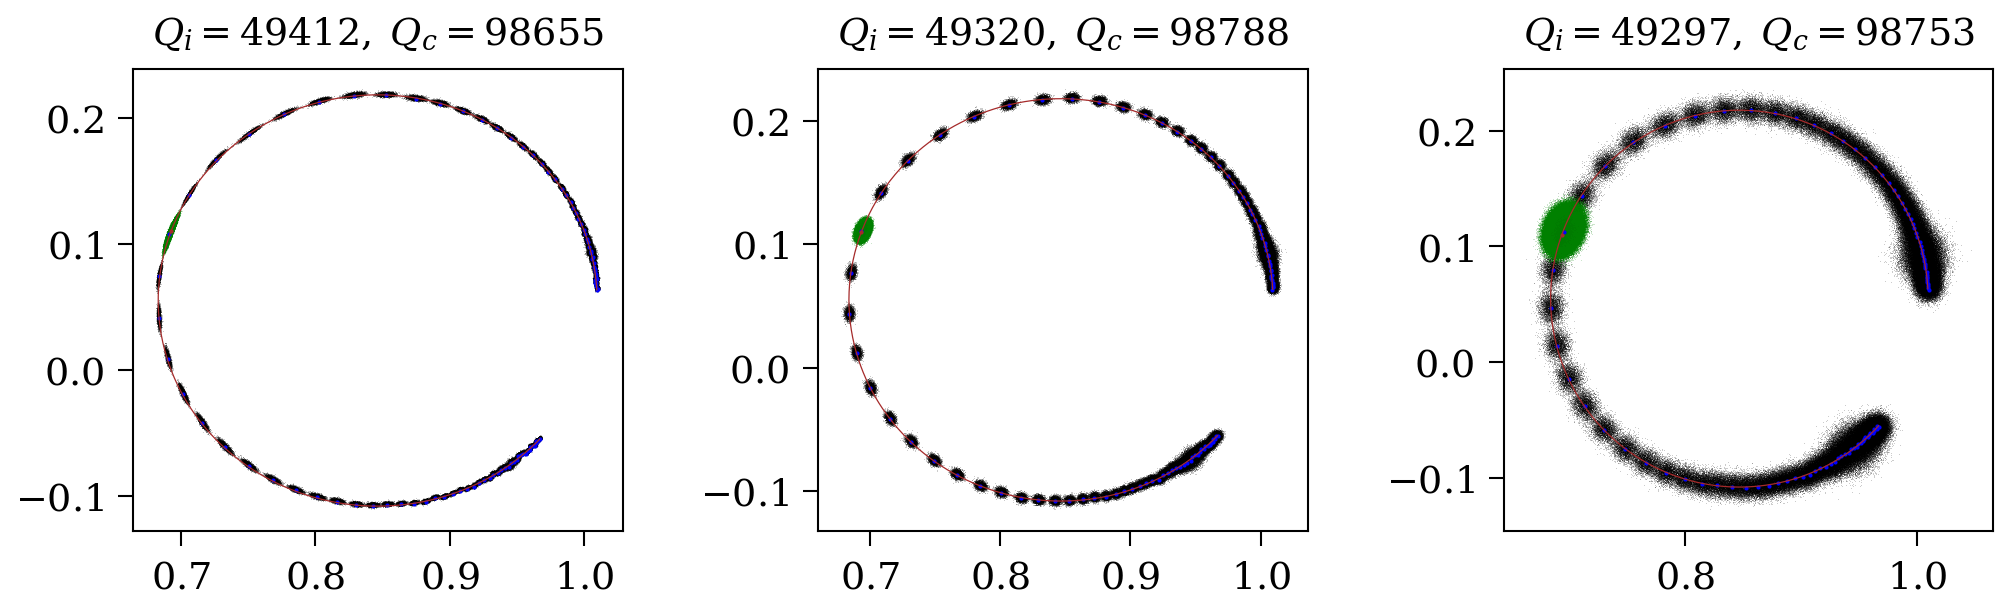

In [16]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

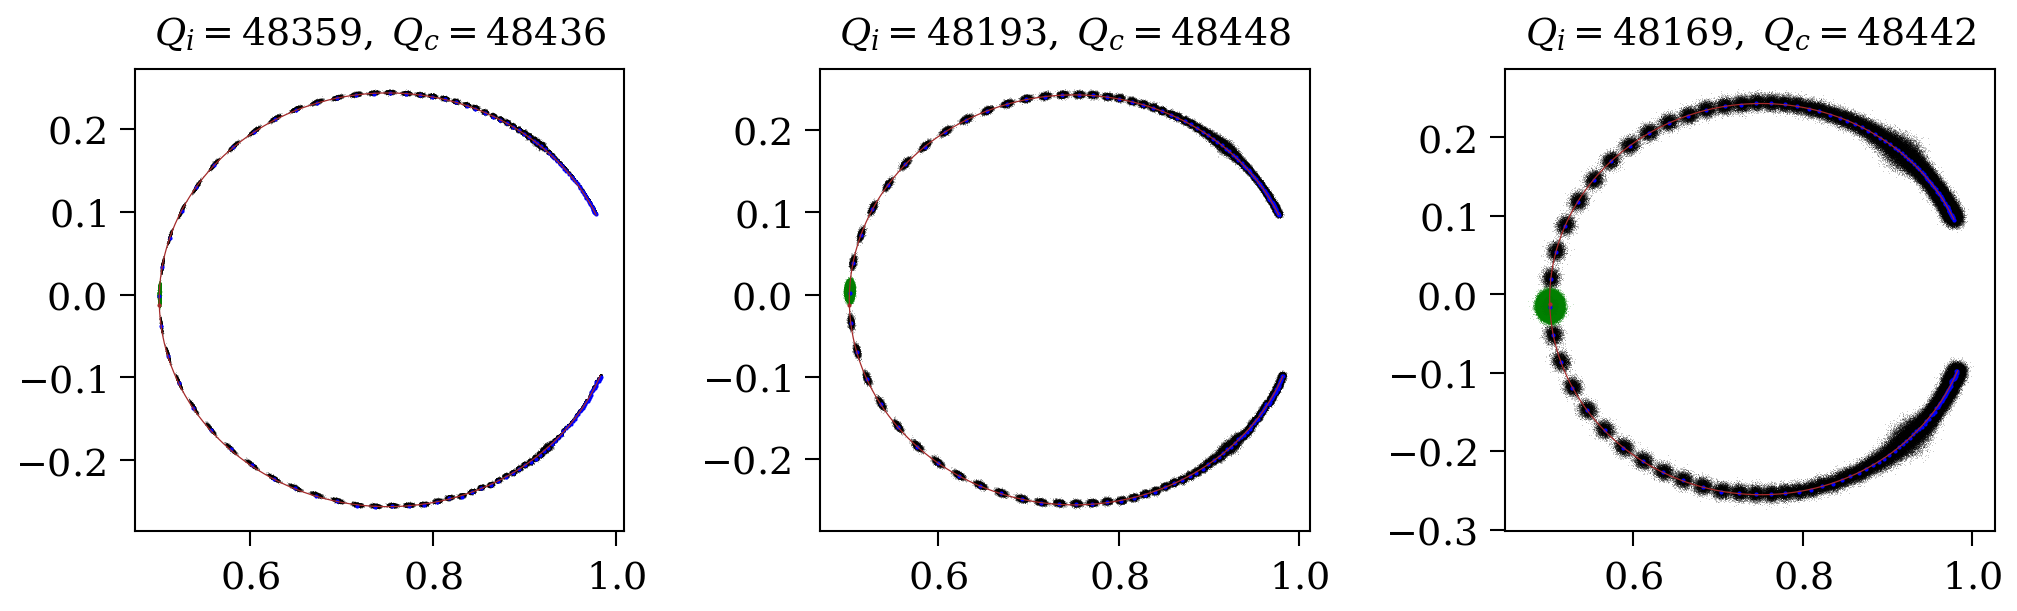

In [17]:
channel = 1
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

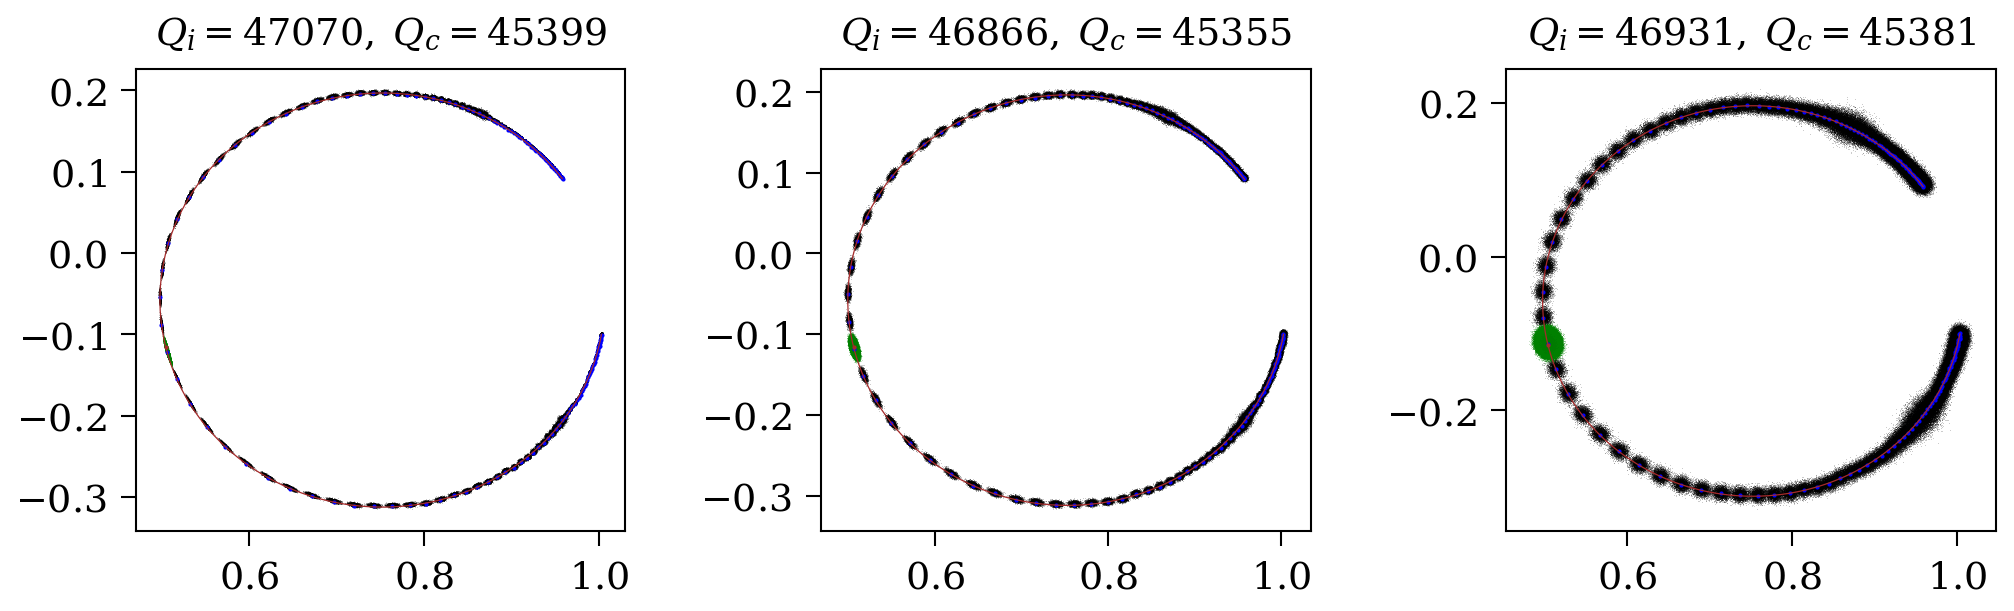

In [18]:
channel = 2
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

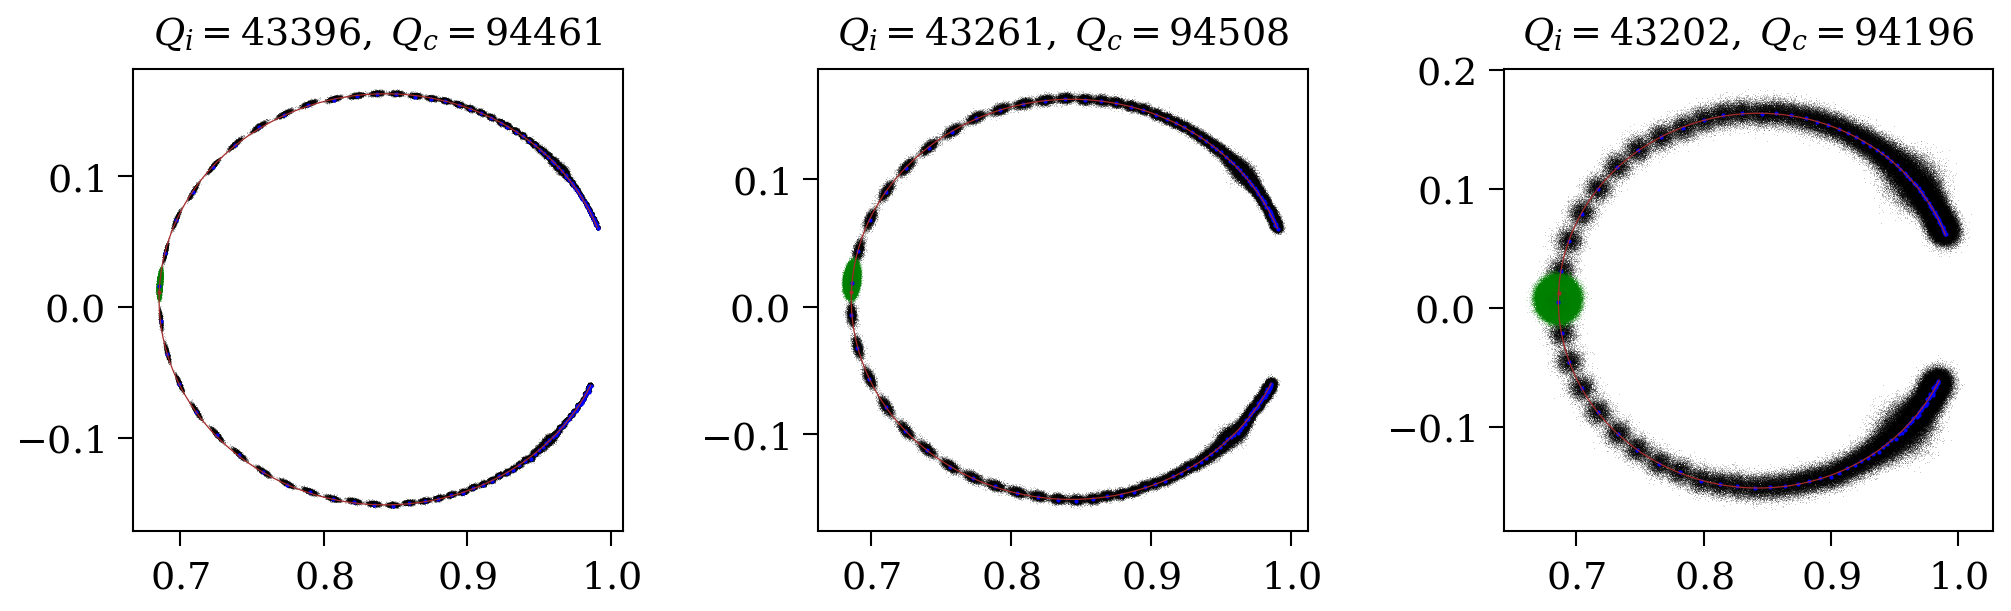

In [19]:
channel = 3
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

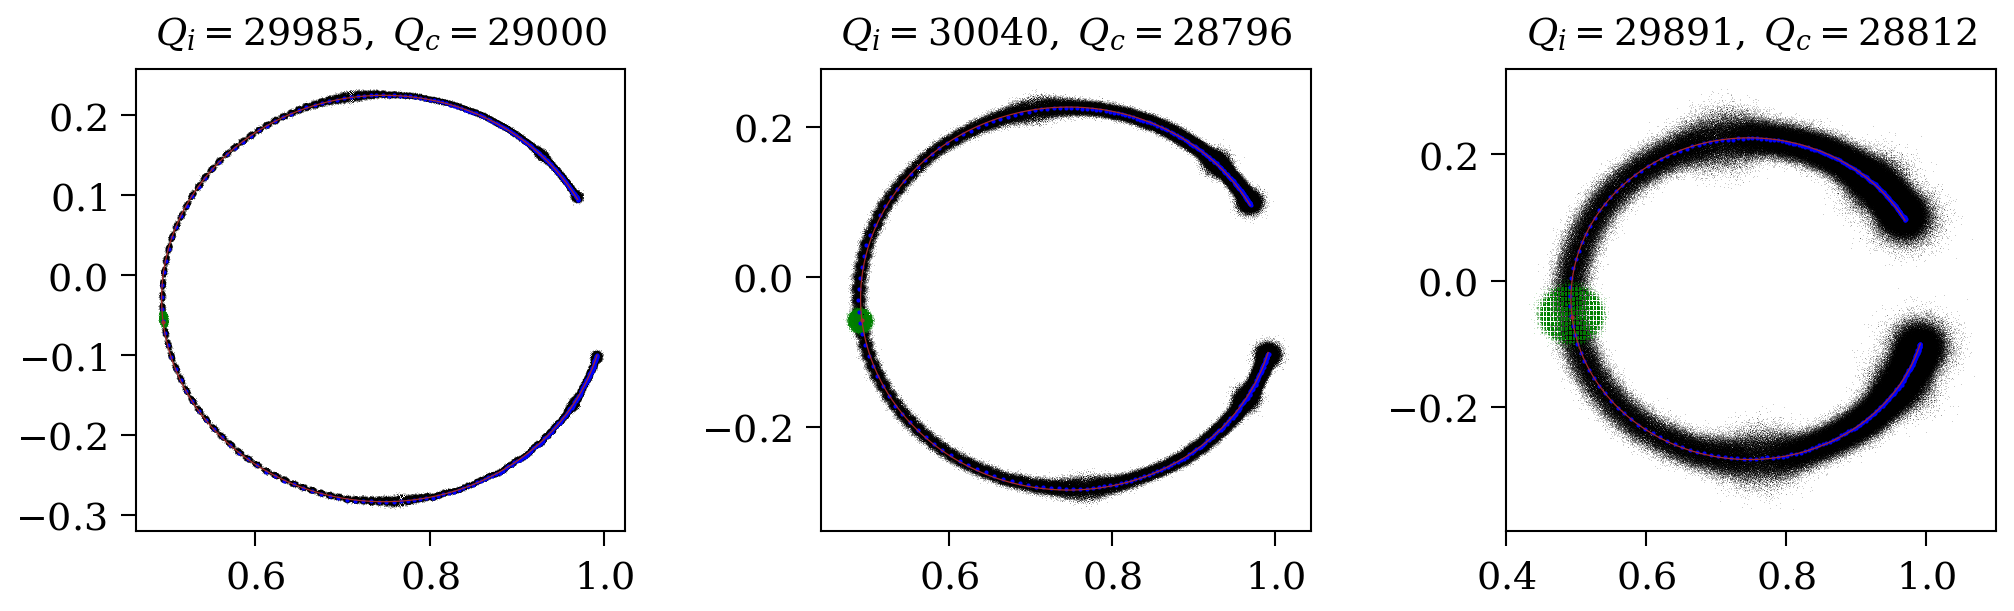

In [20]:
channel = 4
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

# $S_{xx}$ and $S_{yy}$

In [21]:
xx_and_yy = {'xlabel': 'frequency / Hz',
             'ylabel': 'spectral density / Hz$^{-1}$',
             'title': ''}

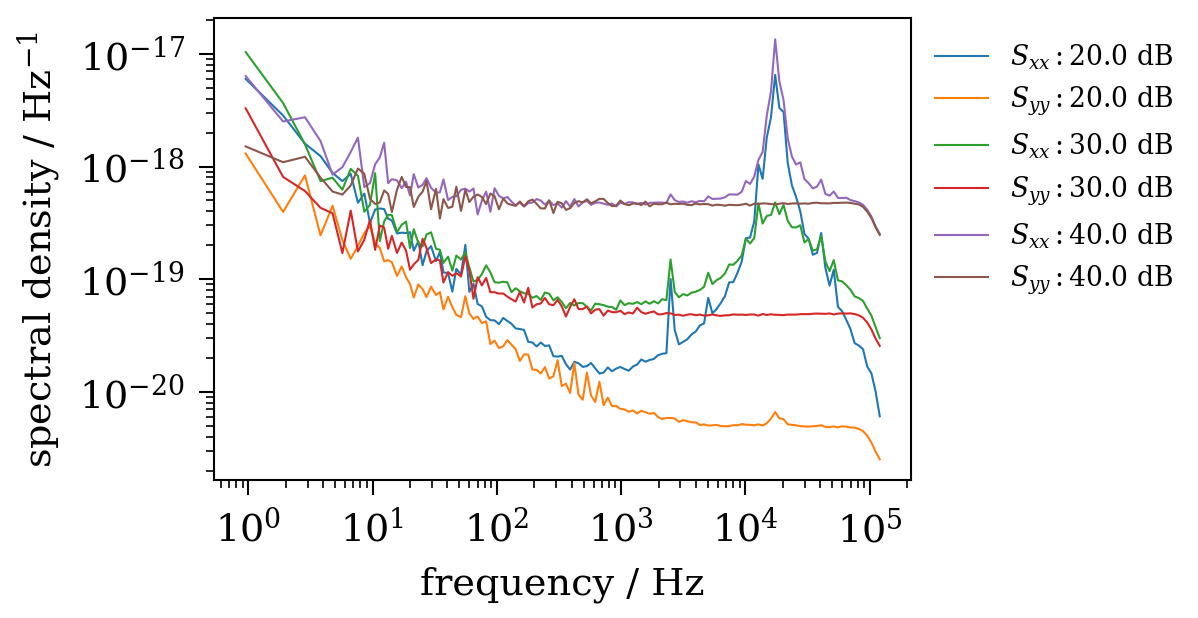

In [22]:
channel = 0
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

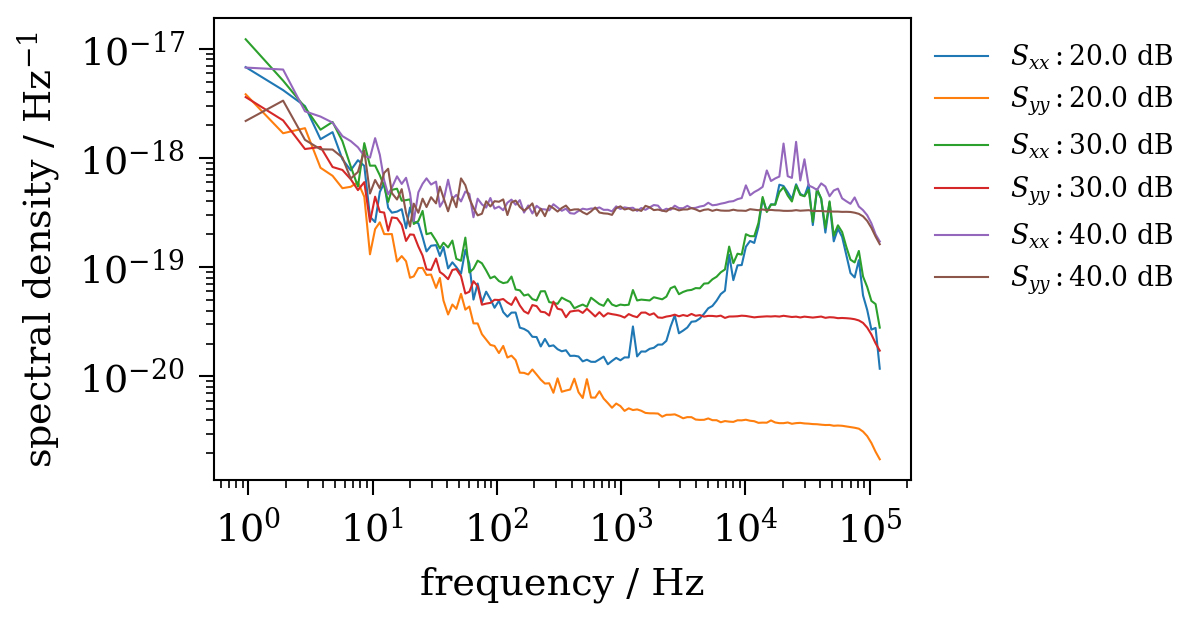

In [23]:
channel = 1
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

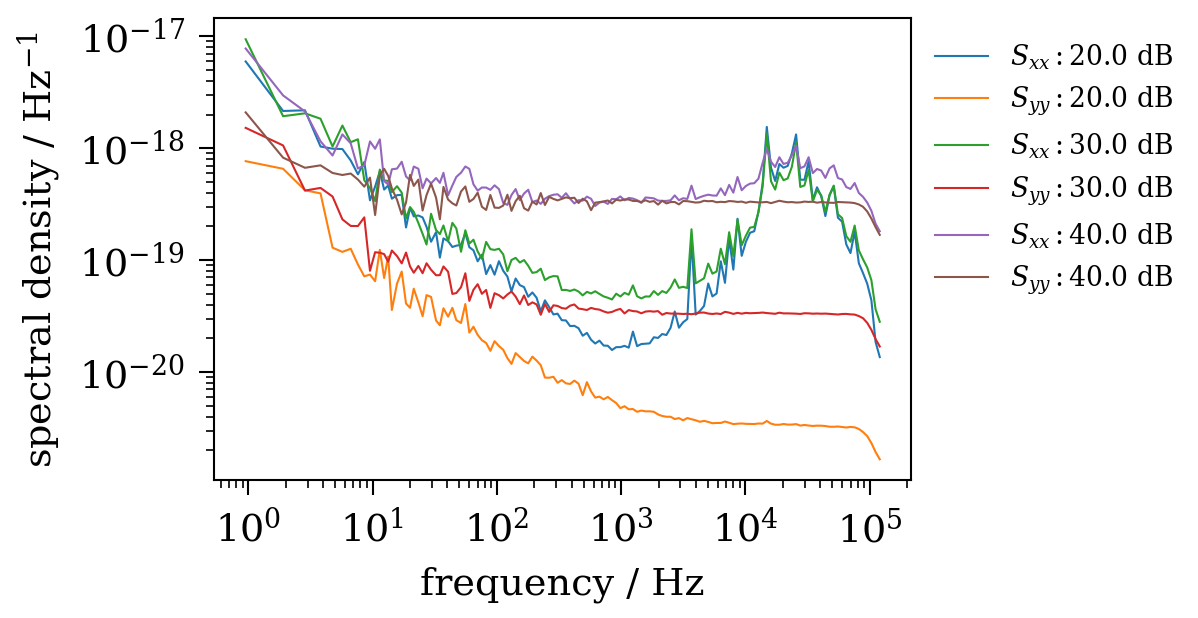

In [24]:
channel = 2
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

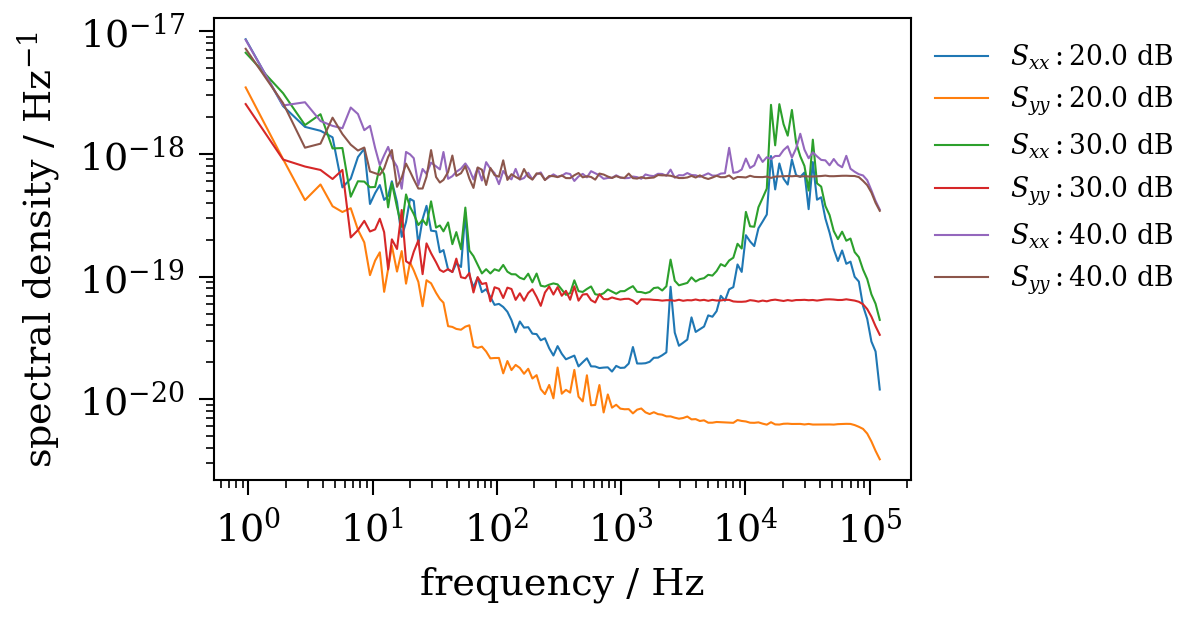

In [25]:
channel = 3
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

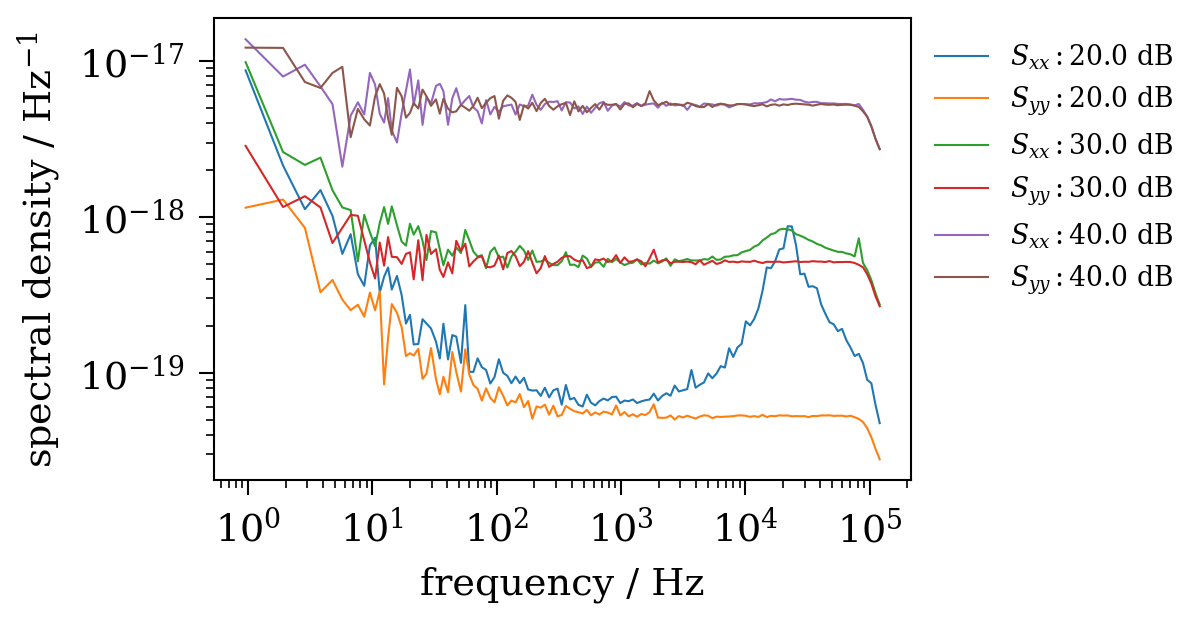

In [26]:
channel = 4
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_and_yy['xlabel'])
ax.set_ylabel(xx_and_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

# $S_{xx} - S_{yy}$

In [27]:
xx_minus_yy = {'xlabel': 'frequency / Hz',
               'ylabel': 'spectral density / Hz$^{-1}$',
               'title': ''}

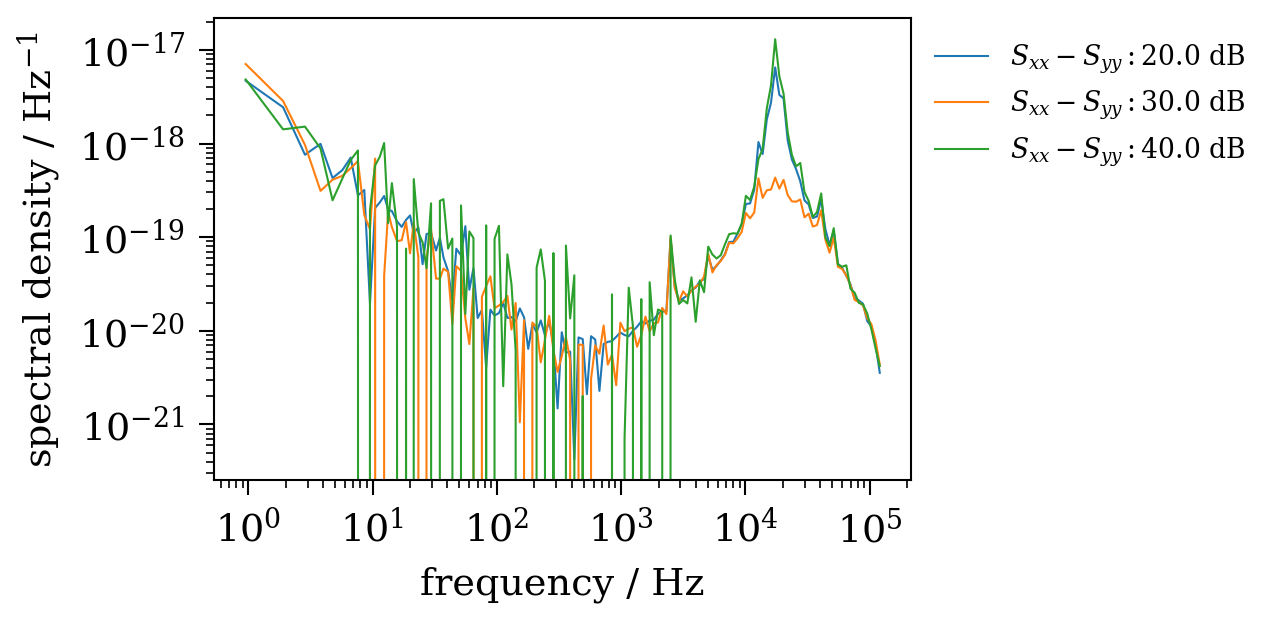

In [28]:
channel = 0
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

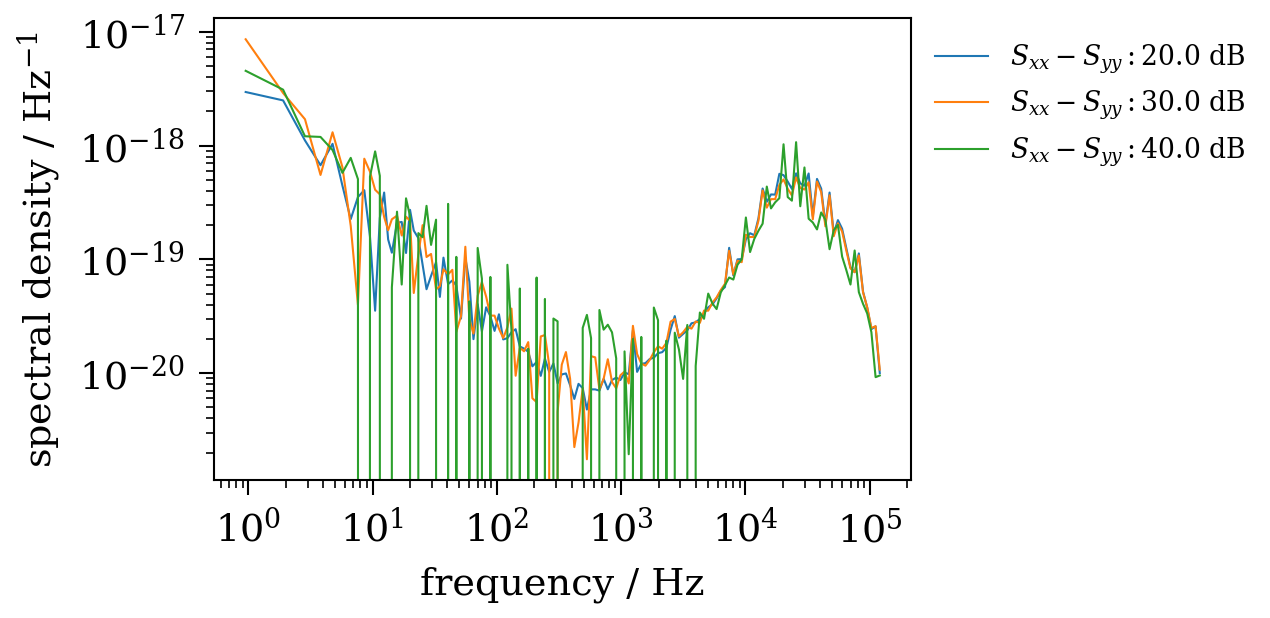

In [29]:
channel = 1
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

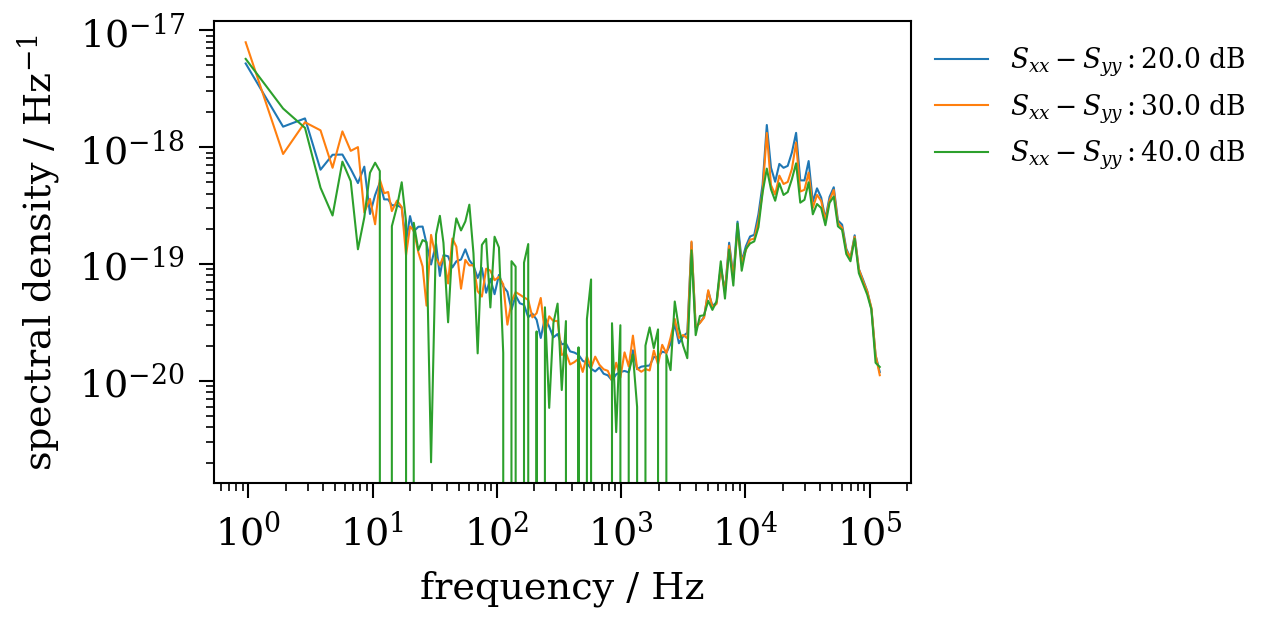

In [30]:
channel = 2
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

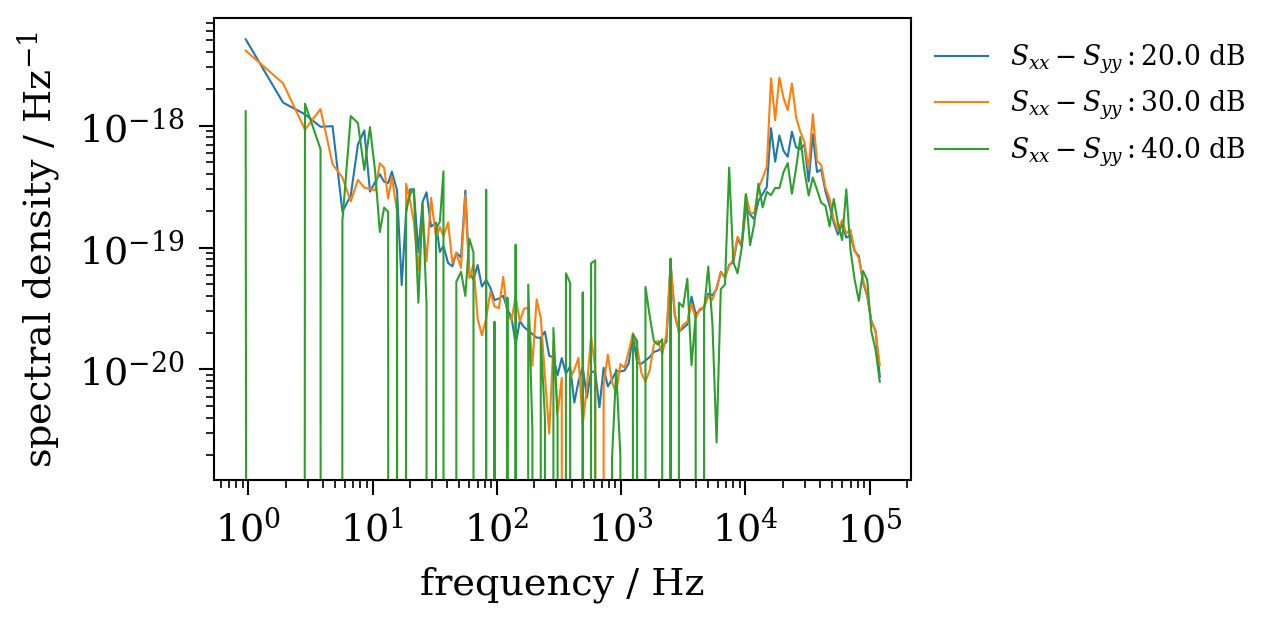

In [31]:
channel = 3
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

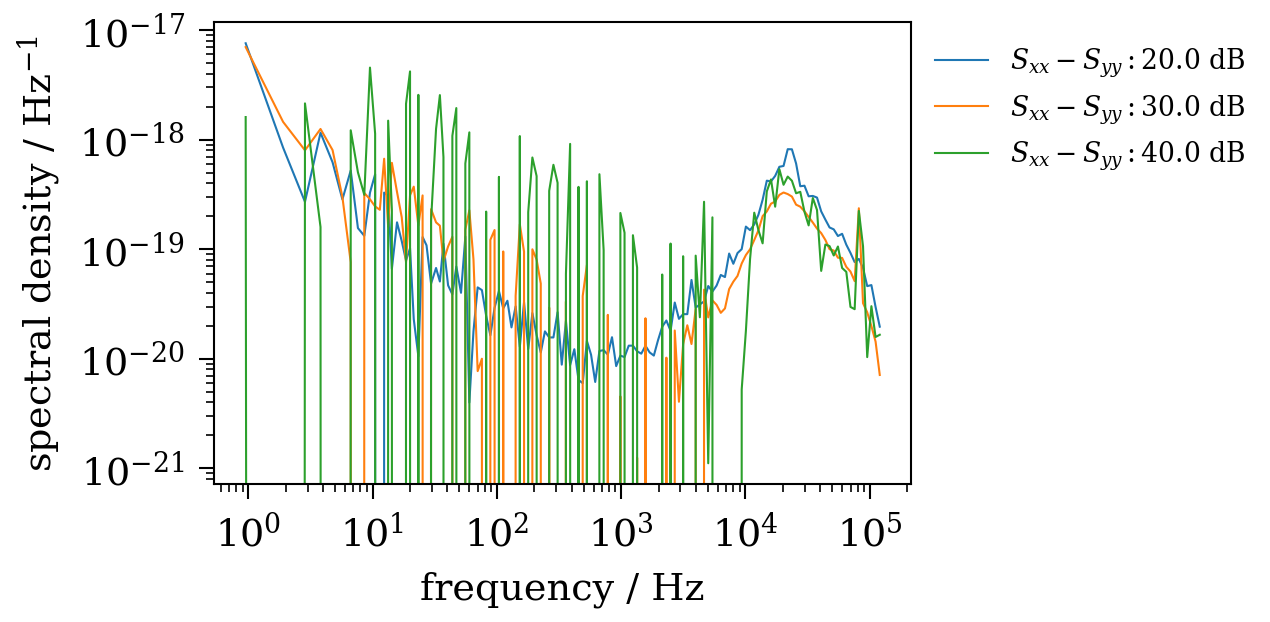

In [32]:
channel = 4
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(xx_minus_yy['xlabel'])
ax.set_ylabel(xx_minus_yy['ylabel'])
for sss in sss_dict[channel]:
    ax.plot(sss.S_frequency, sss.S_xx - sss.S_yy, label='$S_{xx} - S_{yy}: $' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.legend(fontsize='xx-small', ncol=1, bbox_to_anchor=(1, 1));

# Redchi

In [33]:
for swp, sss in zip(swp_list, sss_list):
    print("Sweep: redchi = {:.0f}".format(swp.resonator.current_result.redchi))
    print("SSS: redchi = {:.0f}".format(sss.resonator.current_result.redchi))
    print('----')

Sweep: redchi = 3535
SSS: redchi = 1189
----
Sweep: redchi = 430
SSS: redchi = 238
----
Sweep: redchi = 31
SSS: redchi = 30
----
Sweep: redchi = 3294
SSS: redchi = 1695
----
Sweep: redchi = 13348
SSS: redchi = 257
----
Sweep: redchi = 70
SSS: redchi = 47
----
Sweep: redchi = 3167
SSS: redchi = 1597
----
Sweep: redchi = 461
SSS: redchi = 271
----
Sweep: redchi = 54
SSS: redchi = 41
----
Sweep: redchi = 2282
SSS: redchi = 1417
----
Sweep: redchi = 344
SSS: redchi = 238
----
Sweep: redchi = 32
SSS: redchi = 31
----
Sweep: redchi = 753
SSS: redchi = 625
----
Sweep: redchi = 183
SSS: redchi = 261
----
Sweep: redchi = 16
SSS: redchi = 16
----
